In [16]:
cd C:\Users\dwara\Downloads\Fertilizers_Recommendation_System_For_Disease_Prediction\Dataset Plant Disease


C:\Users\dwara\Downloads\Fertilizers_Recommendation_System_For_Disease_Prediction\Dataset Plant Disease


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)
x_train = train_datagen.flow_from_directory(r'C:\Users\dwara\Downloads\Fertilizers_Recommendation_System_For_Disease_Prediction\Dataset Plant Disease\fruit-dataset\fruit-dataset\train',target_size=(64,64),class_mode='categorical',batch_size=24)

Found 5384 images belonging to 6 classes.


In [18]:
x_test = train_datagen.flow_from_directory(r'C:\Users\dwara\Downloads\Fertilizers_Recommendation_System_For_Disease_Prediction\Dataset Plant Disease\fruit-dataset\fruit-dataset\test',target_size=(64,64),class_mode='categorical',batch_size=24)

Found 1686 images belonging to 6 classes.


In [19]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten

In [21]:
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.add(Dense(800,activation='relu'))
model.add(Dense(650,activation='relu'))

In [23]:
model.add(Dense(6,activation='softmax'))
len(x_train)

225

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
225/225 [==============================] - 48s 210ms/step - loss: 0.7816 - accuracy: 0.7689 - val_loss: 0.2860 - val_accuracy: 0.9075
Epoch 2/10
225/225 [==============================] - 48s 213ms/step - loss: 0.3019 - accuracy: 0.8919 - val_loss: 0.2428 - val_accuracy: 0.9229
Epoch 3/10
225/225 [==============================] - 49s 215ms/step - loss: 0.2165 - accuracy: 0.9244 - val_loss: 0.1576 - val_accuracy: 0.9419
Epoch 4/10
225/225 [==============================] - 56s 251ms/step - loss: 0.1623 - accuracy: 0.9411 - val_loss: 0.1291 - val_accuracy: 0.9561
Epoch 5/10
225/225 [==============================] - 48s 214ms/step - loss: 0.1310 - accuracy: 0.9543 - val_loss: 0.2992 - val_accuracy: 0.9009
Epoch 6/10
225/225 [==============================] - 55s 243ms/step - loss: 0.1258 - accuracy: 0.9549 - val_loss: 0.1496 - val_accuracy: 0.9537
Epoch 7/10
225/225 [==============================] - 50s 222ms/step - loss: 0.1341 - accuracy: 0.9495 - val_loss: 0.1607 - val_ac

In [25]:
model.save('fruit_dataset.h5')

In [26]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('fruit_dataset.h5')

In [27]:
img=image.load_img(r'C:\Users\dwara\Downloads\Fertilizers_Recommendation_System_For_Disease_Prediction\Dataset Plant Disease\fruit-dataset\fruit-dataset\test\Corn_(maize)___Northern_Leaf_Blight\6a72d38e-1bde-4d45-892d-891574de8ca1___RS_NLB 3576.JPG')

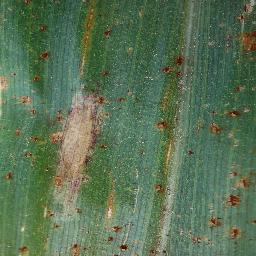

In [28]:
img

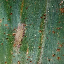

In [29]:
img=image.load_img(r'C:\Users\dwara\Downloads\Fertilizers_Recommendation_System_For_Disease_Prediction\Dataset Plant Disease\fruit-dataset\fruit-dataset\test\Corn_(maize)___Northern_Leaf_Blight\6a72d38e-1bde-4d45-892d-891574de8ca1___RS_NLB 3576.JPG',target_size=(64,64))
img

In [30]:
x=image.img_to_array(img)
x

array([[[ 69., 103.,  66.],
        [ 69., 107.,  70.],
        [ 49.,  89.,  54.],
        ...,
        [ 71.,  83.,  59.],
        [ 68.,  75.,  57.],
        [129., 141., 129.]],

       [[ 69., 108.,  79.],
        [ 58.,  95.,  62.],
        [ 65.,  99.,  64.],
        ...,
        [113.,  91.,  78.],
        [170., 154., 138.],
        [ 50.,  68.,  44.]],

       [[ 58.,  92.,  65.],
        [ 70., 103.,  74.],
        [100., 131., 100.],
        ...,
        [138., 119., 104.],
        [163., 152., 132.],
        [ 26.,  46.,  19.]],

       ...,

       [[106., 131.,  91.],
        [ 94., 121.,  80.],
        [116., 144., 103.],
        ...,
        [ 78., 107.,  77.],
        [ 75., 104.,  76.],
        [ 86., 114.,  89.]],

       [[121., 146., 104.],
        [100., 127.,  84.],
        [ 87., 116.,  72.],
        ...,
        [ 74., 104.,  76.],
        [ 83., 113.,  87.],
        [ 84., 114.,  90.]],

       [[121., 147.,  99.],
        [ 88., 116.,  67.],
        [ 81., 1

In [31]:
x=np.expand_dims(x,axis=0)
x

array([[[[ 69., 103.,  66.],
         [ 69., 107.,  70.],
         [ 49.,  89.,  54.],
         ...,
         [ 71.,  83.,  59.],
         [ 68.,  75.,  57.],
         [129., 141., 129.]],

        [[ 69., 108.,  79.],
         [ 58.,  95.,  62.],
         [ 65.,  99.,  64.],
         ...,
         [113.,  91.,  78.],
         [170., 154., 138.],
         [ 50.,  68.,  44.]],

        [[ 58.,  92.,  65.],
         [ 70., 103.,  74.],
         [100., 131., 100.],
         ...,
         [138., 119., 104.],
         [163., 152., 132.],
         [ 26.,  46.,  19.]],

        ...,

        [[106., 131.,  91.],
         [ 94., 121.,  80.],
         [116., 144., 103.],
         ...,
         [ 78., 107.,  77.],
         [ 75., 104.,  76.],
         [ 86., 114.,  89.]],

        [[121., 146., 104.],
         [100., 127.,  84.],
         [ 87., 116.,  72.],
         ...,
         [ 74., 104.,  76.],
         [ 83., 113.,  87.],
         [ 84., 114.,  90.]],

        [[121., 147.,  99.],
       

In [32]:
y=np.argmax(model.predict(x),axis=1)
y

1/1 [==============================] - 2s 2s/step


array([3], dtype=int64)

In [33]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [34]:
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___healthy','Corn_(maize)___Northern_Leaf_Blight','Peach___Bacterial_spot','Peach___healthy']

In [35]:
index[y[0]]

'Corn_(maize)___Northern_Leaf_Blight'